**Linear Regression and Learning Curve**

In [2]:
#Import necessary things

# Python 2 & 3 Compatibility
from __future__ import division

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.dates as dte
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
import datetime

%matplotlib inline

**Exercise 4.1**

Generate (fake) data that is linearly related to log(x). You are making this model up. It is of the form B0 + B1(log(x)) + epsilon. (You are making up the parameters.) Simulate some data from this model. Then fit two models to it: quadratic (second degree polynomial), logarithmic (log(x)). (The second one should fit really well, since it has the same form as the underlying model!)

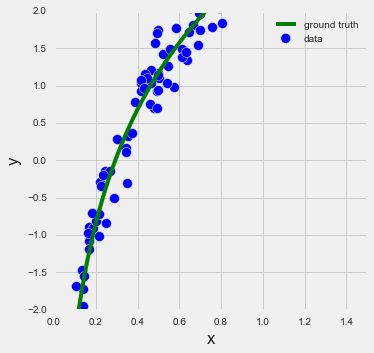

In [8]:
from IPython.core.pylabtools import figsize
figsize(5,5)
plt.style.use('fivethirtyeight')

# We start by seeding the random number generator so that everyone will have the same "random" results
np.random.seed(9)

# Function that returns 2.7 + 4log(x)
def f(x):
    return 2.7 + 2.2*np.log(x)

# generate points used to plot
# This returns 100 evenly spaced numbers from 0 to 1
x_plot = np.linspace(0, 1, 100)

# generate points and keep a subset of them
n_samples = 100
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
# Generate the y values by taking the above function and adding a random Gaussian (normal) noise term
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

# Plot the training data against what we know to be the ground truth function
fig,ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1.5))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

In [15]:
#First fit a quadratic model
model1 = sm.OLS(y, sm.add_constant(X**2))
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     141.2
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.06e-20
Time:                        17:35:53   Log-Likelihood:                -168.94
No. Observations:                 100   AIC:                             341.9
Df Residuals:                      98   BIC:                             347.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.2192      0.195     -6.259      0.000        -1.606    -0.833
x1             5.5029      0.463     11.885      0.000         4.584     6.422
==============================================================================
Omnibus:                       57.861   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.883
Skew:                          -2.056   Prob(JB):                     1.77e-43
Kurtosis:                       8.509   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#Then fit the logarithmic model
model2 = sm.OLS(y, sm.add_constant(np.log(X)))
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4731.
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           9.34e-85
Time:                        17:33:04   Log-Likelihood:                -18.697
No. Observations:                 100   AIC:                             41.39
Df Residuals:                      98   BIC:                             46.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.7287      0.044     61.982      0.000         2.641     2.816
x1             2.1935      0.032     68.783      0.000         2.130     2.257
==============================================================================
Omnibus:                        2.041   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.499
Skew:                          -0.075   Prob(JB):                        0.473
Kurtosis:                       2.419   Cond. No.                         2.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Exercise 4.2**

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.) Split the data into a training and test set. Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set. (You could use sklearn.metrics.mean_squared_error.)

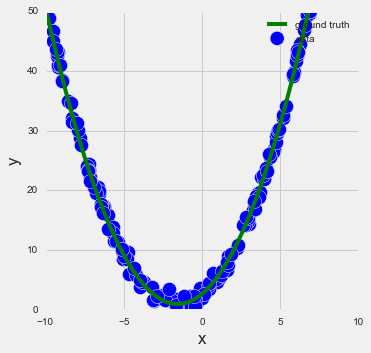

In [104]:
#Generate the fake data

from IPython.core.pylabtools import figsize
figsize(5,5)
plt.style.use('fivethirtyeight')

# Seeding the random number generator
np.random.seed(9)

# Function that returns 2.7 + 2.2x + .7x^2
def f(x):
    return 2.7 + 2.2*x + .7*(x**2)

# generate points used to plot
# This returns 100 evenly spaced numbers from 0 to 1
x_plot = np.linspace(-10, 10, 200)

# generate points and keep a subset of them
n_samples = 200
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(-10, 10, size=n_samples)[:, np.newaxis]
# Generate the y values by taking the above function and adding a random Gaussian (normal) noise term
y = f(X) + np.random.normal(scale=0.7, size=n_samples)[:, np.newaxis]

# Plot the training data against what we know to be the ground truth function
fig,ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=200)
ax.set_ylim((0, 50))
ax.set_xlim((-10, 10))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

In [105]:
#Generate X matrix
X_mat = pd.DataFrame(X, columns = ['X'])
X_mat['Xsq'] = X**2
X_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
X      200 non-null float64
Xsq    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.25, random_state=42)

In [107]:
#Run the model with sklearn:
from sklearn import metrics

lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

#Get predictions on training set
y_pred_training = lr.predict(X_train)

#Get mean squared error for training data
print "MSE for training data,", metrics.mean_squared_error(y_train, y_pred_training)

# Get predictions on the test set
y_pred_test = lr.predict(X_test)

#Get mean squared error for test data
print "MSE for test data,", metrics.mean_squared_error(y_test, y_pred_test)

MSE for training data, 0.457238439143
MSE for test data, 0.623382286755


**Exercise 4.3**

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot: training error, test error, R squared

In [108]:
#I need to create training and testing data for just the original X to feed into the polynomial function 
# (not the matrix of X and X^2 I created in #2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

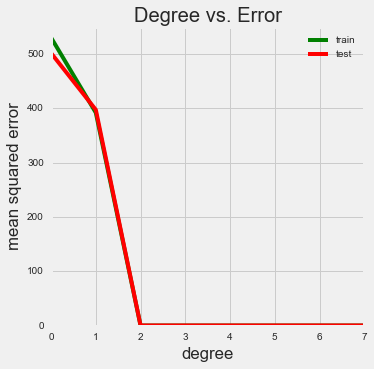

In [111]:
# import PolynomialFeatures and make_pipeline for Polynomial Regression, plus mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Step through degrees from 0 to 7 and store the training and test (generalization) error.
train_error = np.empty(8)
test_error = np.empty(8)
rsqr_train = np.empty(8)
rsqr_test = np.empty(8)

for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))
    rsqr_train[degree] = est.score(X_train, y_train)
    rsqr_test[degree] = est.score(X_test, y_test)
    

# Plot the training and test errors against degree
plt.plot(np.arange(8), train_error, color='green', label='train')
plt.plot(np.arange(8), test_error, color='red', label='test')
plt.ylim((0.0, 550.0))
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.title('Degree vs. Error');

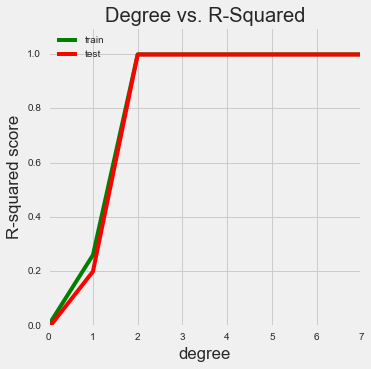

In [112]:
# Plot the R_squares against degree
plt.plot(np.arange(8), rsqr_train, color='green', label='train')
plt.plot(np.arange(8), rsqr_test, color='red', label='test')
plt.ylim((0.0, 1.1))
plt.ylabel('R-squared score')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.title('Degree vs. R-Squared');

**Exercise 4.4**

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [113]:
#First get train test split again on the X matrix containing both X and X^2
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.25, random_state=42)

In [114]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 114 to 102
Data columns (total 2 columns):
X      150 non-null float64
Xsq    150 non-null float64
dtypes: float64(2)
memory usage: 3.5 KB


In [115]:
train_error = []
test_error = []

n=5
while n <= 150:
    #Set up the model
    lr = LinearRegression()

    # Fit the model to the designated portion of the training data
    lr.fit(X_train[0:n], y[0:n])

    #Get predictions on this portion of the training set
    y_pred_training = lr.predict(X_train[0:n])

    #Calculate & save training error
    train_error.append(mean_squared_error(y_train[0:n], y_pred_training))

    # Get predictions on the test set
    y_pred_test = lr.predict(X_test)

    #Calculate & save test error
    test_error.append(mean_squared_error(y_test, y_pred_test))

    n +=5
    
print train_error
print test_error

[477.99035699864817, 320.90499904120441, 199.50649769452508, 380.39394286365263, 463.299375840089, 340.20242896603594, 351.54281657133379, 299.77201086652059, 297.48508526780773, 288.00431082451507, 365.15444851874986, 348.04304562736519, 357.45153591476361, 429.14655911588585, 397.21071342049487, 440.67744488392657, 391.77239179216548, 385.31409514418493, 380.05175131665055, 404.06060134029985, 385.23904098555579, 370.40424274828302, 358.76329381865901, 332.18188468487733, 342.27766051090742, 349.65128098460241, 341.5774610019572, 352.61434015395582, 352.97320049537308, 355.23497917023963]
[1517.0131029814688, 1214.3166494051823, 199.41392436842349, 341.95902432006352, 370.12042237418905, 246.34043883178768, 298.93482429822211, 256.70803951659536, 259.33959677452322, 259.96116619834282, 312.55001744255304, 308.74567482221977, 324.16063876033752, 367.16330790935336, 344.71303839097823, 360.01763032977425, 328.19148459230183, 334.74714507351086, 335.79673651539895, 348.28480385329351, 3

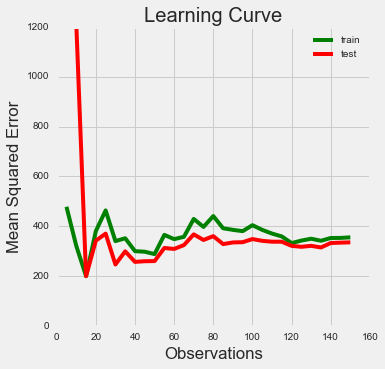

In [116]:
# Plot the mean squared error against # of observations
observations = range(5, 151, 5)

plt.plot(observations, train_error, color='green', label='train')
plt.plot(observations, test_error, color='red', label='test')
plt.ylim((0.0, 1200.0))
plt.ylabel('Mean Squared Error')
plt.xlabel('Observations')
plt.legend(loc='upper right')
plt.title('Learning Curve');